This notebook is to exercise the knowledge I gained from studying chapter 2.
I downloaded the dataset from
https://www.kaggle.com/datasets/larsen0966/student-performance-data-set
Let's go

In [26]:
import numpy as np
import pandas as pd

data = pd.read_csv("datasets/student-por.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [28]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [29]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


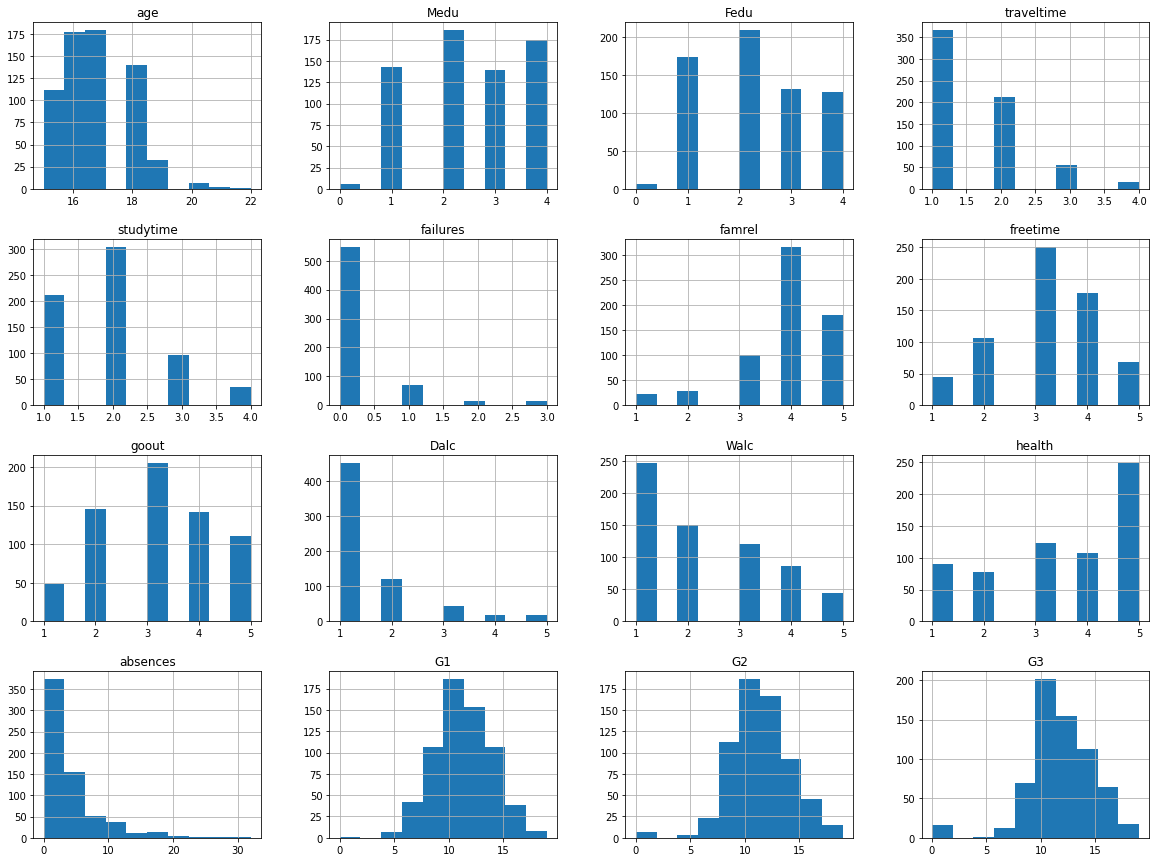

In [31]:
import matplotlib.pyplot as plt

data.hist(figsize=(20, 15))
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

#random_state sets the random seed
train_set, test_set = train_test_split(data, test_size=0.2, random_state=50)
train_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
276,GP,M,16,U,GT3,T,2,1,other,other,...,4,3,3,1,1,4,7,15,16,16
202,GP,F,17,U,GT3,A,3,3,health,other,...,3,3,3,1,3,3,10,12,13,14
97,GP,F,16,U,GT3,T,2,1,other,other,...,4,3,5,1,1,5,0,13,12,12
390,GP,F,18,R,GT3,T,2,2,at_home,other,...,4,4,4,1,1,4,6,14,13,14
232,GP,F,17,U,GT3,T,2,3,at_home,other,...,3,3,3,1,4,3,4,12,13,13


In [33]:
train_data = train_set.drop(['G1', 'G2', 'G3'], axis=1)
g1_labels = train_set['G1'].copy()
g2_labels = train_set['G2'].copy()
g3_labels = train_set['G3'].copy()

# Handling Numeric Values

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder


class AbsencesTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        mms = MinMaxScaler(feature_range=(0, 5))
        absences = X[['absences']]
        res = np.round(mms.fit_transform(absences))
        return np.c_[res]


num_trans = ColumnTransformer([
    ('absence', AbsencesTransformer(), ['absences']),
    ('ord', OrdinalEncoder(), ['age']),

])
num_trans.fit_transform(train_data)


array([[1., 1.],
       [2., 2.],
       [0., 1.],
       ...,
       [0., 2.],
       [0., 1.],
       [0., 4.]])

# Handling Text Values

In [35]:
from sklearn.preprocessing import OneHotEncoder

ord_enc_attr = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
                'nursery', 'higher',
                'internet', 'romantic']
onehot_enc_attr = ['Mjob', 'Fjob', 'reason', 'guardian']

text_pipeline = ColumnTransformer([
    ('ord_enc', OrdinalEncoder(), ord_enc_attr),
    ('onehot_enc', OneHotEncoder(), onehot_enc_attr)
])
text_pipeline.fit_transform(train_data)

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [36]:
ord_enc_attr = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
                'nursery', 'higher', 'internet', 'romantic']
onehot_enc_attr = ['Mjob', 'Fjob', 'reason', 'guardian']

full_pipline = ColumnTransformer([
    ('ord_enc', OrdinalEncoder(), ord_enc_attr),
    ('onehot_enc', OneHotEncoder(sparse=False), onehot_enc_attr),
    ('abs_trans', AbsencesTransformer(), ['absences']),
    ('age_trans', OrdinalEncoder(), ['age']),
], remainder="passthrough")
data_transformed = full_pipline.fit_transform(train_data)
data_transformed

array([[0., 1., 1., ..., 1., 1., 4.],
       [0., 0., 1., ..., 1., 3., 3.],
       [0., 0., 1., ..., 1., 1., 5.],
       ...,
       [0., 0., 1., ..., 1., 1., 4.],
       [0., 0., 1., ..., 1., 1., 4.],
       [1., 0., 1., ..., 1., 1., 2.]])

In [37]:
data_transformed_pd = pd.DataFrame(data_transformed)

In [43]:
# Predicting g1 grades with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

l_reg_g1 = LinearRegression()
l_reg_g1.fit(data_transformed, g1_labels)

predictions = l_reg_g1.predict(data_transformed_pd)
mse = mean_squared_error(g1_labels, predictions)
rmse = np.sqrt(mse)
print(rmse)

2.1909199290648513


In [44]:
# Predicting g2 grades with linear regression
l_reg_g2 = LinearRegression()
l_reg_g2.fit(data_transformed, g2_labels)

predictions = l_reg_g2.predict(data_transformed_pd)
mse = mean_squared_error(g2_labels, predictions)
rmse = np.sqrt(mse)
print(rmse)

2.3462851948446275


In [45]:
# Predicting g3 grades with linear regression
l_reg_g3 = LinearRegression()
l_reg_g3.fit(data_transformed, g3_labels)

predictions = l_reg_g3.predict(data_transformed_pd)
mse = mean_squared_error(g3_labels, predictions)
rmse = np.sqrt(mse)
print(rmse)

2.575753298459668


In [51]:
# Predicting g1 grades with Decision Tree regression
from sklearn.tree import DecisionTreeRegressor

tree_reg_g3 = DecisionTreeRegressor()
tree_reg_g3.fit(data_transformed, g3_labels)

predictions = tree_reg_g3.predict(data_transformed_pd)
mse = mean_squared_error(g3_labels, predictions)
rmse = np.sqrt(mse)
print(rmse)

0.0


In [76]:
from sklearn.model_selection import cross_val_score

# cross_val_score expects a utility function (greater is better) rather than a cost function (smaller is better). So, the scoring function is the opposite of MSE.
scores = cross_val_score(tree_reg_g3, data_transformed_pd, g3_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


def display_scores(scorez):
    print(f"Scores: {scorez}")
    print(f"Mean: {scorez.mean()}")
    print(f"STD: {scorez.std()}")


display_scores(tree_rmse_scores)

Scores: [4.14172019 4.55943654 4.19706857 3.76981942 3.08532507 3.25221818
 3.75704467 4.24037371 4.11610346 3.62182924]
Mean: 3.874093904990764
STD: 0.43993833270173854


In [77]:
scores = cross_val_score(l_reg_g3, data_transformed_pd, g3_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [2.83428049 2.59544797 2.45732555 2.61851236 2.34524073 2.31214614
 2.77962886 3.11731001 3.40816522 3.25610962]
Mean: 2.7724166945613242
STD: 0.3618813030481113


In [78]:
from sklearn.ensemble import RandomForestRegressor

# Random forest works by training many decision tress with random set of features and average these predictions
rfr = RandomForestRegressor()
rfr.fit(data_transformed_pd, g3_labels)
scores = cross_val_score(rfr, data_transformed_pd, g3_labels, scoring="neg_mean_squared_error", cv=10)
rfr_rmse_scores = np.sqrt(-scores)

display_scores(rfr_rmse_scores)

Scores: [2.90541404 2.63718855 2.37768148 2.51494342 2.18512409 2.50376371
 2.52612732 3.08101944 3.48147515 2.97006404]
Mean: 2.718280123999654
STD: 0.36654947057173337


In [59]:
import joblib

joblib.dump(rfr, "random_forest_regressor.pkl")  # to save

['random_forest_regressor.pkl']

In [82]:
# Model Fine-Tuning
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30, 60, 100], 'max_features': [6, 8, 10, 12]},  # bootstrap = True
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
# The trial of different combinations of hyperparams can be done using "GridSearchCV". It will do cross-validation to evaluate the combinations.
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_transformed_pd, g3_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [6, 8, 10, 12],
                          'n_estimators': [30, 60, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [83]:
print(grid_search.best_params_)
grid_search.best_estimator_

{'max_features': 6, 'n_estimators': 60}


RandomForestRegressor(max_features=6, n_estimators=60)

In [84]:
curves = grid_search.cv_results_
for mean_score, params in zip(curves["mean_test_score"], curves["params"]):
    print(np.sqrt(-mean_score), params)

2.74122646744971 {'max_features': 6, 'n_estimators': 30}
2.682285983804291 {'max_features': 6, 'n_estimators': 60}
2.7046102923448703 {'max_features': 6, 'n_estimators': 100}
2.7210761157641157 {'max_features': 8, 'n_estimators': 30}
2.73830328702104 {'max_features': 8, 'n_estimators': 60}
2.706362093562208 {'max_features': 8, 'n_estimators': 100}
2.7394968214289888 {'max_features': 10, 'n_estimators': 30}
2.7080776386834198 {'max_features': 10, 'n_estimators': 60}
2.6938226553554614 {'max_features': 10, 'n_estimators': 100}
2.7431484301981817 {'max_features': 12, 'n_estimators': 30}
2.7085708375209103 {'max_features': 12, 'n_estimators': 60}
2.697853222625163 {'max_features': 12, 'n_estimators': 100}
3.2852992654427897 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.9162826412428955 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.3064882417110195 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.961344393792499 {'bootstrap': False, 'max_features':

In [85]:
# To check the importance of each feature:
feature_importance = grid_search.best_estimator_.feature_importances_
print(feature_importance)

[0.04281002 0.02273747 0.01651084 0.01227047 0.00840261 0.0149099
 0.01893    0.00514584 0.0167205  0.01324464 0.04820932 0.02109435
 0.01929344 0.01533946 0.006008   0.01219244 0.00792875 0.01330245
 0.00674358 0.00292388 0.01462    0.01409277 0.00515159 0.01670733
 0.01332576 0.01554294 0.01416241 0.00784729 0.00949596 0.00245088
 0.02416537 0.04890751 0.04802191 0.04220294 0.02667844 0.03988481
 0.10113696 0.03488355 0.04137986 0.05090596 0.02876251 0.03781664
 0.03713862]


In [90]:
# Test the model with test set
final_model = grid_search.best_estimator_
X_test = test_set.drop(['G1', 'G2', 'G3'], axis=1)
y_test_g3 = test_set['G3'].copy()
X_test_prepared = full_pipline.transform(X_test)  # Transform, net fit_transform
final_predictions = final_model.predict(X_test_prepared)

In [91]:
final_mse = mean_squared_error(y_test_g3, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

2.6582720433413614


In [97]:
# Fine tuning the model using GridSearchCV with DecisionTree regressor
parameters = {"splitter": ["best", "random"],
              "max_depth": [1, 3, 5, 10],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_weight_fraction_leaf": [0.1, 0.2, 0.3],
              "max_features": ["auto", "log2", "sqrt", None],
              "max_leaf_nodes": [None, 10, 20, 30, ]}

grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_transformed_pd, g3_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 10],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [100]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_prepared)

In [101]:
final_mse = mean_squared_error(y_test_g3, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

2.8442118100263656
